In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploration des données


In [2]:
# Chargement du dataset
df = pd.read_csv("titanic_with_anomalies.csv")

In [3]:
# Affichez les 10 lignes aléatoirement pour avoir un aperçu des valeurs colonnes
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.05,NaN,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.925,NaN,S
696,697,0,3,"Kelly, Mr. James",male,jeune,0,0,363592,8.05,NaN,S
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0,D45,S
921,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,NaN,NaN,NaN
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S


In [4]:
# Identification des doublons : vérifier s’il y a des lignes identiques ou suspectes. Supprimer les doublons si besoin
df.duplicated().sum()

np.int64(45)

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

np.int64(0)

## Les incohérences observées:
- Des personnes de classes 3 payent leur billet plus chère que des personnes de classe 1 (ex: PassengerId 693 vs 513) ou encore PassengerId 526 -> Fare = 100000
- Certains passagers ont survecu mais on sait pas si c'est parce qu'ils ont pas embarqué (ex: PassengerId 517)
- Certains passagers ont une forme exceptionnelle car malgré un âge très avancé (200 ans !) et une cabine classe 3, ils ont survécu au naufrage! (ex: PassengerId 221)

Pour les reperer par la programmation, on peut appliquer des recherches conditionnelles sur plusieurs colonnes
- ex: trouver les passagers de classe 3 qui ont un tarif plus important que les passagers de classe 1
- ex: chercher les passagers qui ont survécu ET qui ne sont pas C, Q ou S dans la colonne Embarked
- ex: faire un tri descendant ou juste une recherche en fonction d'une valeur seuil pour la colonne Age

In [7]:
# Utilisez les méthodes info() et describe(), etc. pour analyser les types de données et
# les statistiques descriptives des variables numériques et catégorielles.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          653 non-null    object
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         807 non-null    object
 10  Cabin        186 non-null    object
 11  Embarked     800 non-null    object
dtypes: int64(5), object(7)
memory usage: 90.5+ KB


In [8]:
df.describe().round(2)

,PassengerId,Survived,Pclass,SibSp,Parch
count,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,0.77,0.68
std,257.35,0.49,0.84,2.68,3.07
min,1.00,0.00,1.00,0.00,0.00
25%,223.50,0.00,2.00,0.00,0.00
50%,446.00,0.00,3.00,0.00,0.00
75%,668.50,1.00,3.00,1.00,0.00
max,891.00,1.00,3.00,25.00,30.00


In [9]:
df.describe(include=['O']).round(2)

,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
count,891,891,653,891,807,186,800
unique,891,2,90,681,236,143,3
top,"Braund, Mr. Owen Harris",male,24.0,347082,13.0,G6,S
freq,1,577,28,7,37,4,579


# 2. Prétraiter les données

In [10]:
# Vérification des valeurs manquantes : Vérifiez les valeurs manquantes et traitez-les en les
# remplissant par la moyenne, le mode ou en les supprimant si nécessaire.

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            238
SibSp            0
Parch            0
Ticket           0
Fare            84
Cabin          705
Embarked        91
dtype: int64

La colonne Cabin contient trop de valeurs manquantes donc on peut la supprimer

In [11]:
# Suppression de la colonne 'Cabin' qui contient trop de valeurs manquantes
df.drop(columns=["Cabin"], inplace=True)

In [12]:
# Remplacement des valeurs manquantes dans 'Embarked' par la valeur la plus fréquente (modale)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

C:\Users\Marou\AppData\Local\Temp\ipykernel_7672\1279693242.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [13]:
# Vérification des valeur manquantes
val_manquantes = df.isnull().sum()
print(f"Valeurs manquantes: \n {val_manquantes}")

Valeurs manquantes: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            238
SibSp            0
Parch            0
Ticket           0
Fare            84
Embarked         0
dtype: int64


Les colonnes Fare et Age devrait être de type numerique mais ce n'est pas le cas car elle contiennent de donnée sous forme de chaine de caractère, par conséquent je vais chercher dans un 1er temps quelles sont ces chaine de caractères, puis décider de les traiter, afin de pouvoir les convertir en 2 colonnes numériques

In [14]:
import re
# Fonction qui permet de vérifier si une string contient des caractères alphabetiques
def contains_alphabetical(s):
    return bool(re.search(r'[a-zA-Z]', str(s)))

# Création d'une variable qui contient seulement les données qui ont des caractères alphabétiques
filtered_strings_age = df[df['Age'].apply(contains_alphabetical)]
filtered_strings_fare = df[df['Fare'].apply(contains_alphabetical)]
print(f"Valeurs de la colonne Age qui ne sont pas numériques {filtered_strings_age['Age'].unique()}")
print(f"Valeurs de la colonne Fare qui ne sont pas numériques {filtered_strings_fare['Fare'].unique()}")

Valeurs de la colonne Age qui ne sont pas numériques [nan 'jeune']
Valeurs de la colonne Fare qui ne sont pas numériques [nan 'gratuit']


In [15]:
print(filtered_strings_age['Age'].value_counts())
print(filtered_strings_fare['Fare'].value_counts())

Age
jeune    9
Name: count, dtype: int64
Fare
gratuit    9
Name: count, dtype: int64


- Pour la colonne Age n'ayant pas de définition de l'équivalent numérique de "jeune" et compte tenu du faible nombre, je choisi de les supprimer
- Pour Fare, je choisi de remplacer gratuit par 0

In [16]:
delete_jeune = 'jeune'
df = df[df['Age'] != delete_jeune]

In [17]:
# Association chaine de caractère et valeur numérique
mapping_fare = {
    'gratuit': 0,
}
# Remplacement des valeurs en chaîne de caractères par leur valeurs numériques
df['Fare'] = df['Fare'].apply(lambda x: mapping_fare.get(x, x))

In [18]:
# Vérification du traitement
filtered_strings_age2 = df[df['Age'].apply(contains_alphabetical)]
filtered_strings_fare2 = df[df['Fare'].apply(contains_alphabetical)]
print(f"Valeurs de la colonne Age qui ne sont pas numériques {filtered_strings_age2['Age'].unique()}")
print(f"Valeurs de la colonne Fare qui ne sont pas numériques {filtered_strings_fare2['Fare'].unique()}")

Valeurs de la colonne Age qui ne sont pas numériques [nan]
Valeurs de la colonne Fare qui ne sont pas numériques [nan]


In [19]:
# Transformation des colonnes Fare et Age en colonnes numériques
df['Fare'] = pd.to_numeric(df['Fare'])
df['Age'] = pd.to_numeric(df['Age'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  882 non-null    int64  
 1   Survived     882 non-null    int64  
 2   Pclass       882 non-null    int64  
 3   Name         882 non-null    object 
 4   Sex          882 non-null    object 
 5   Age          644 non-null    float64
 6   SibSp        882 non-null    int64  
 7   Parch        882 non-null    int64  
 8   Ticket       882 non-null    object 
 9   Fare         799 non-null    float64
 10  Embarked     882 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 82.7+ KB


In [21]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,882.00,882.00,882.00,644.00,882.00,882.00,799.00
mean,445.93,0.38,2.30,31.18,0.78,0.68,11294.18
std,257.61,0.49,0.84,25.14,2.70,3.08,105595.84
min,1.00,0.00,1.00,-10.00,0.00,0.00,-100.00
25%,223.25,0.00,2.00,20.00,0.00,0.00,7.90
50%,445.50,0.00,3.00,28.00,0.00,0.00,14.45
75%,669.75,1.00,3.00,38.00,1.00,0.00,31.28
max,891.00,1.00,3.00,200.00,25.00,30.00,1000000.00


Les 2 colonnes sont numériques, nous observons que les 2 contiennent des valeurs négatives qui feront l'objet d'un traitement ultérieur

In [22]:
from sklearn.impute import SimpleImputer
# Remplacement des valeurs manquantes dans 'Age' et 'Fare' par la médiane
imputer = SimpleImputer(strategy="median")
df["Fare"] = imputer.fit_transform(df[["Fare"]])
df["Age"] = imputer.fit_transform(df[["Age"]])

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
# Vérification des valeurs aberrantes : Identifiez les valeurs aberrantes dans les colonnes numériques,
# Traitez ces valeurs en les remplaçant par la moyenne, la médiane, ou en les supprimant selon le cas.
def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Slicing
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

In [25]:
outlier_fare = detect_outliers_iqr(df, "Fare")
outlier_age = detect_outliers_iqr(df, "Age")

In [26]:
print(outlier_fare)
print("-----------------------")
print(outlier_age)

     PassengerId  Survived  Pclass  \
31            32         1       1   
52            53         1       1   
55            56         1       1   
61            62         1       1   
62            63         0       1   
..           ...       ...     ...   
849          850         1       1   
851          852         0       3   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                               Name     Sex   Age  SibSp  \
31   Spencer, Mrs. William Augustus (Marie Eugenie)  female  28.0      1   
52         Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
55                                Woolner, Mr. Hugh    male  28.0      0   
61                              Icard, Miss. Amelie  female  38.0      0   
62                      Harris, Mr. Henry Birkhardt    male  45.0      1   
..                                              ...     ...   ...    ...   
849    Gold

In [27]:
# @title Remplacer les outliers par la mediane
def replace_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

In [28]:
df = replace_outliers_iqr(df, "Fare")
df = replace_outliers_iqr(df, "Age")

In [29]:
outlier_updated_fare = detect_outliers_iqr(df, "Fare")
outlier_updated_age = detect_outliers_iqr(df, "Age")
print(outlier_updated_fare)
print("-----------------------")
print(outlier_updated_age)

     PassengerId  Survived  Pclass  \
3              4         1       1   
6              7         0       1   
35            36         0       1   
43            44         1       2   
50            51         0       3   
..           ...       ...     ...   
824          825         0       3   
838          839         1       3   
853          854         1       1   
867          868         0       1   
871          872         1       1   

                                                 Name     Sex   Age  SibSp  \
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  28.0      0   
35                     Holverson, Mr. Alexander Oskar    male  42.0      1   
43           Laroche, Miss. Simonne Marie Anne Andree  female  28.0      1   
50                         Panula, Master. Juha Niilo    male   7.0      4   
..                                                ...     ...   ...    ... 

In [30]:
# Encodage des variables catégorielles : Pour les variables catégorielles telles que Sex et Embarked,
#appliquez un encodage approprié (par exemple, encodage One-Hot ou Label Encoding).
df['Sex'].value_counts()

Sex
male      572
female    310
Name: count, dtype: int64

In [31]:
df['Embarked'].value_counts()

Embarked
S    662
C    153
Q     67
Name: count, dtype: int64

Un encodage One-hot sera plus approprié pour Sex et Label Encoding pour Embarked

In [32]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [33]:
from sklearn.preprocessing import LabelEncoder
# Initialisation du LabelEncoder
label_encoder = LabelEncoder()
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [34]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",28.0,1,0,PC 17599,14.4542,2,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,False
4,5,0,3,"Allen, Mr. William Henry",28.0,0,0,373450,14.4542,2,True
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,14.4542,2,True
6,7,0,1,"McCarthy, Mr. Timothy J",28.0,0,0,17463,51.8625,2,True
7,8,0,3,"Palsson, Master. Gosta Leonard",28.0,3,1,349909,21.0750,2,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,2,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,0,False


# 3. Diagrammes/graphiques et visualisations de données


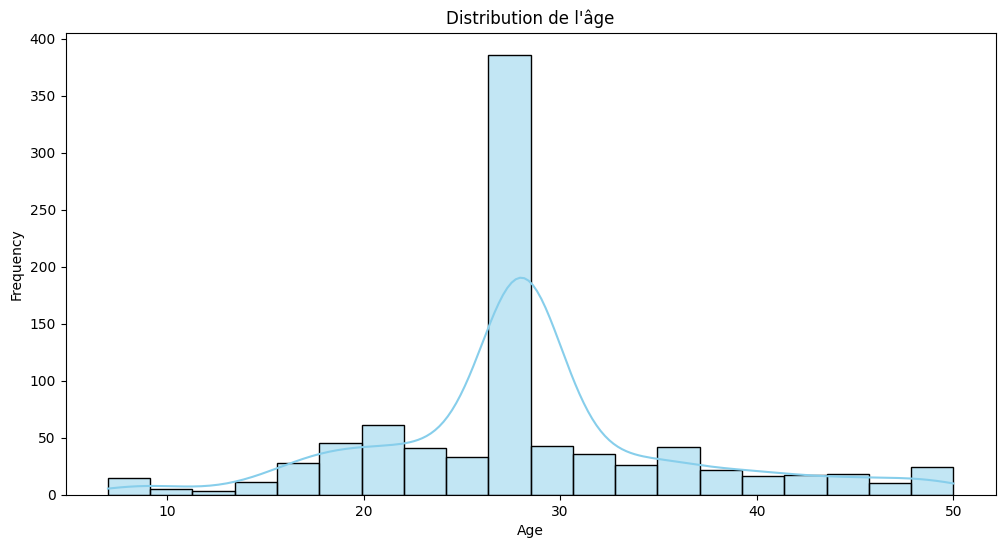

In [35]:
# Pour les variables numériques Age, Fare nous utiliserons des Histogrammes et Boxplot afin d'observer la distribution et les valeurs aberantes
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution de l\'âge')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [36]:
from scipy.stats import skew
ages_customer = df['Age']
skew_age = skew(ages_customer)
print("Skew value:", skew_age)

Skew value: 0.3961356056463059


Résultat compris entre -0,5 et 0,5 => approximativement symétrique (un test de Shapiro-Wilk pourrait indiquer si la distribution suit une loi normale)

Text(0, 0.5, 'Frequency')

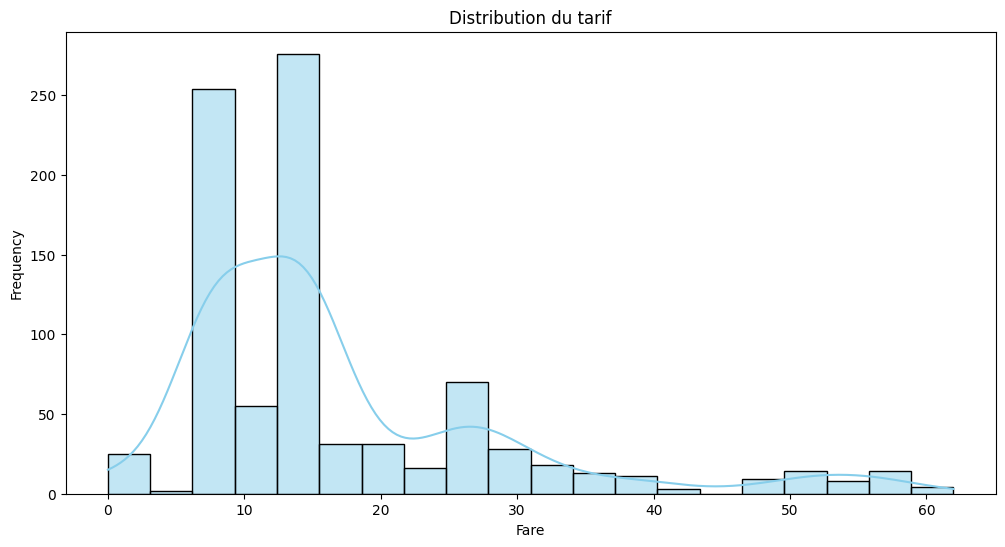

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], bins=20, kde=True, color='skyblue')
plt.title('Distribution du tarif')
plt.xlabel('Fare')
plt.ylabel('Frequency')

In [38]:
fare_customer = df['Fare']
skew_fare = skew(fare_customer)
print("Skew value:", skew_fare)

Skew value: 1.7032023594183776


Confirmation du visuel que la distribution des tarif est très assymétrique avec une queue vers la droite

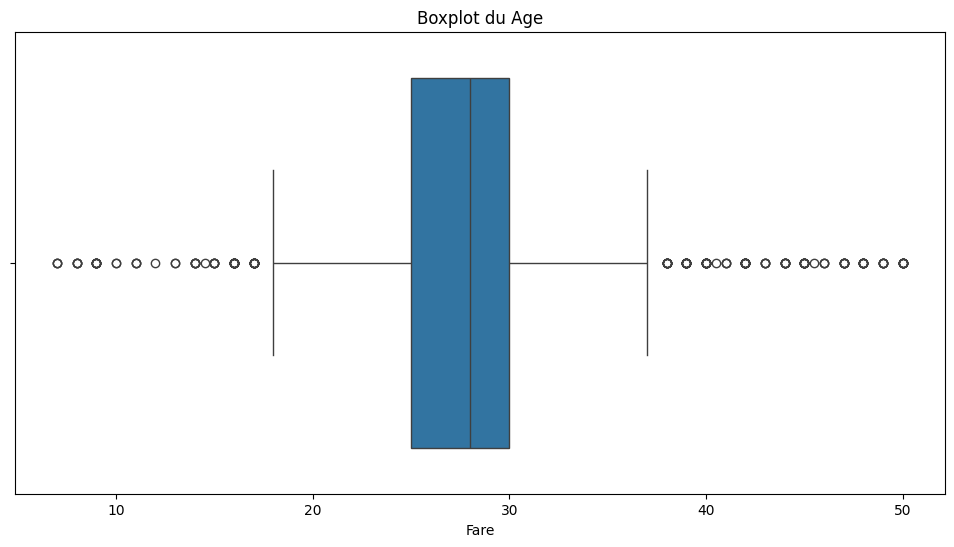

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot du Age')
plt.xlabel('Fare')
plt.show()

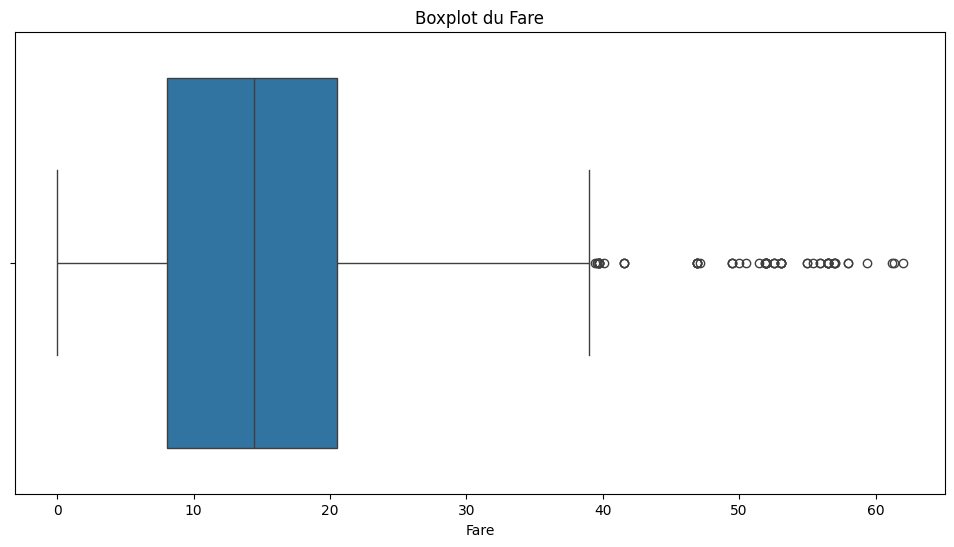

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot du Fare')
plt.xlabel('Fare')
plt.show()

([<matplotlib.patches.Wedge at 0x1671f967e00>,
 [Text(-1.0972100011947408, -0.07829567854126497, 'Classe 1'),
  Text(-0.09001505260112745, -1.0963107635635148, 'Classe 2'),
  Text(0.8273466124918255, 0.7249121207417499, 'Classe 3')],
 [Text(-0.5984781824698585, -0.042706733749780894, '24.5%'),
  Text(-0.049099119600614964, -0.5979876892164625, '20.6%'),
  Text(0.4512799704500866, 0.3954066113136817, '54.9%')])

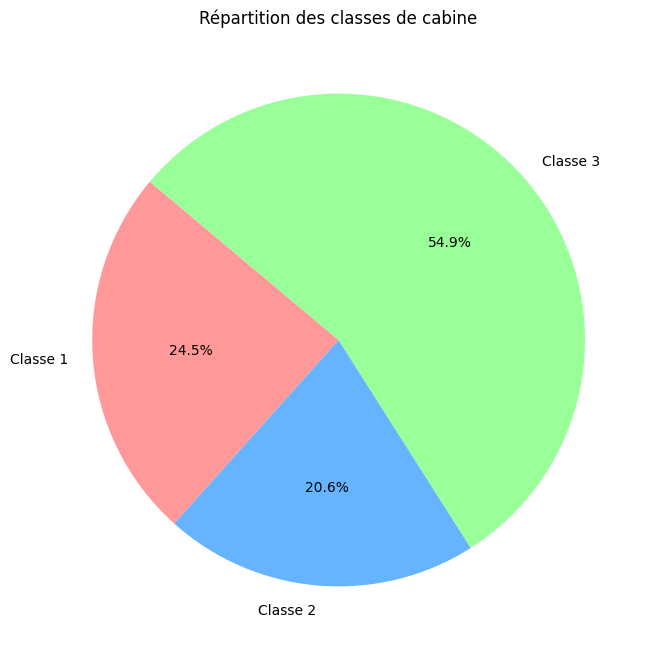

In [41]:
# Pour les variables catégorielles Sex, Pclass, Embarked nous pouvons utiliser plusieurs type de diagramme
# Diagramme circulaire pour les classes de cabine
plt.figure(figsize=(16, 8))
plt.title('Répartition des classes de cabine')
labels = 'Classe 1', 'Classe 2','Classe 3'
sizes = [df['Pclass'].value_counts()[1], df['Pclass'].value_counts()[2], df['Pclass'].value_counts()[3]]
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

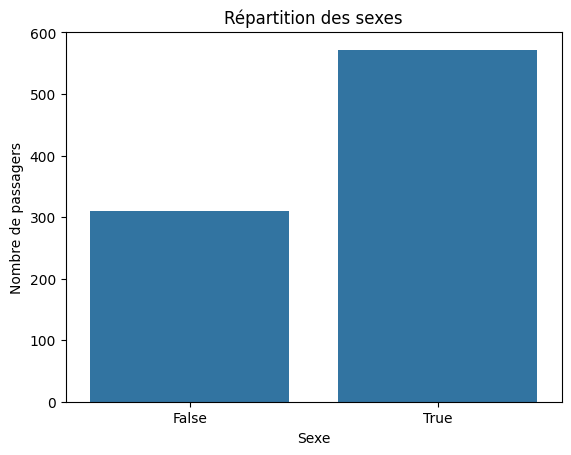

In [42]:
# Diagramme en barre pour le sexe
sns.countplot(x='Sex_male', data=df)
plt.title('Répartition des sexes')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.show()

# 4. Loi normale

In [43]:
# Test de Shapiro-Wilk pour vérifier si les âges suivent une loi normale.
from scipy import stats
statistic, p_value = stats.shapiro(df['Age'])
print("\nResultats du test Shapiro-Wilk:")
print(f"Statistique: {statistic}")
print(f"P-value: {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value > alpha:
    print("Les données de l'âge suivent une distribution normale")
else:
    print("Les données de l'âge ne suivent pas une distribution normale.")



Resultats du test Shapiro-Wilk:
Statistique: 0.9152456408781464
P-value: 8.595298590059746e-22
Les données de l'âge ne suivent pas une distribution normale.


# 5. Test d'hypothèse

- H₀ (hypothèse nulle) : Il n'y a pas d'association entre les âges des survivants et le sexe
- H₁ (hypothèse alternative) : Il existe une association entre les âges des survivants et le sexe

In [44]:
# Filtrer les données pour les survivants et non survivant
survived_data = df[df['Survived'] == 1]['Age']
not_survived_data = df[df['Survived'] == 0]['Age']


In [45]:
from scipy import stats
# Réalisation du test de Student
t_stat, p_value = stats.ttest_ind(survived_data, not_survived_data, alternative='greater')

In [55]:
print(f"Statistique t: {t_stat}")
print(f"Valeur p: {p_value}")
# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("Nous rejetons l'hypothèse nulle (H₀), il existe une association entre les âges des survivants et le sexe.")
else:
    print("Nous ne pouvons pas rejeter l'hypothèse nulle (H₀), il n'y a pas d'association entre les âges des survivants et le sexe.")

Statistique t: 1.3485114106274543
Valeur p: 6.018327849132383e-212
Nous rejetons l'hypothèse nulle (H₀), il existe une association entre les âges des survivants et le sexe.


## Test d'association entre l'âge et le sexe chez les survivants
Nous allons comparer l'âge moyen des hommes et des femmes parmi les survivants à l'aide d'un test t de Student.

In [47]:
# Séparer les survivants selon le sexe (Sex_male = 1 pour homme, 0 pour femme)
survivants_hommes = df[(df['Survived'] == 1) & (df['Sex_male'] == 1)]['Age']
survivants_femmes = df[(df['Survived'] == 1) & (df['Sex_male'] == 0)]['Age']

from scipy import stats
# Test t de Student pour comparer l'âge moyen des hommes et des femmes survivants
t_stat_sex, p_value_sex = stats.ttest_ind(survivants_hommes, survivants_femmes, equal_var=False)
print(f"Statistique t: {t_stat_sex}")
print(f"Valeur p: {p_value_sex}")
alpha = 0.05
if p_value_sex < alpha:
    print("Nous rejetons l'hypothèse nulle (H₀), il existe une différence significative d'âge entre les hommes et les femmes survivants.")
else:
    print("Nous ne pouvons pas rejeter l'hypothèse nulle (H₀), il n'y a pas de différence significative d'âge entre les hommes et les femmes survivants.")

Statistique t: 1.2923059283049545
Valeur p: 0.19772710079832126
Nous ne pouvons pas rejeter l'hypothèse nulle (H₀), il n'y a pas de différence significative d'âge entre les hommes et les femmes survivants.


# 6. Statistiques inférentielles
- Effectuez un test du Chi-deux pour étudier la relation entre la survie et la classe des passagers.
- Interprétez la p-value pour déterminer si la classe influence les chances de survie.
- Réalisez une analyse de la variance (ANOVA) pour étudier l'effet de la classe sur le prix du billet (`Fare`).
Interprétez les résultats de l'ANOVA.


- H₀ (hypothèse nulle) : Il n'y a pas d'association entre la survie et la classe des passagers
- H₁ (hypothèse alternative) : Il existe une association entre la survie et la classe des passagers

In [48]:
# Créer une nouvelle colonne 'Survivant'
df['Survivor'] = df['Survived'] == 1

In [49]:
# Créer une table de contingence pour voir la répartition des survivants et des classes de passagers
contingency_table = pd.crosstab(df['Survivor'], df['Pclass'])
contingency_table

Pclass,1,2,3
Survivor,,,
False,80,96,367
True,136,86,117


In [50]:
from scipy.stats import chi2_contingency
# Calculer le test du chi²
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [51]:
# Afficher les résultats du test
print(f"Statistique du chi²: {chi2}")
print(f"Valeur p: {p}")
print(f"Degrés de liberté: {dof}")
print("Tableau des fréquences attendues:")
print(expected)

Statistique du chi²: 102.49988422331667
Valeur p: 5.526280731818138e-23
Degrés de liberté: 2
Tableau des fréquences attendues:
[[132.97959184 112.04761905 297.97278912]
 [ 83.02040816  69.95238095 186.02721088]]


In [52]:
# Interprétation des résultats
alpha = 0.05
if p < alpha:
    print("Nous rejetons l'hypothèse nulle (H₀), il existe une association entre la survie et la classe de passagers.")
else:
    print("Nous ne pouvons pas rejeter l'hypothèse nulle (H₀), aucune association significative n'est trouvée.")

Nous rejetons l'hypothèse nulle (H₀), il existe une association entre la survie et la classe de passagers.


In [53]:
# ANOVA
f_statistic, p_value = stats.f_oneway(df['Fare'], df['Pclass'])
print("Resultats test ANOVA:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")
# Interpretation des resultats
alpha = 0.05
if p_value < alpha:
  print("Nous rejetons l'hypothèse nulle: Il existe des différences significatives entre le prix du billet et la classe des passagers.")
else:
  print("Nous ne pouvons pas rejeter l'hypothèse nulle: Il n'y a pas de différences significatives entre le prix du billet et la classe des passagers.")

Resultats test ANOVA:
F-statistic: 1286.0037360753531
P-value: 6.018327849132383e-212
Nous rejetons l'hypothèse nulle: Il existe des différences significatives entre le prix du billet et la classe des passagers.


# Algèbre linéaire et Probabilités appliquées aux données
- Représenter les observations comme vecteurs.
- Calculer des distances entre deux observations (euclidienne, manhattan, cosinus).
- Calculer les probabilités conditionnelles de survivre en étant Hommes vs Femme


In [57]:
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import eig, det

X = df.drop(columns=['Survived'])

# Sélectionner uniquement les colonnes numériques pour les calculs
X_numeric = X.select_dtypes(include=[np.number])

# Distance euclidienne entre 2 individus
dist = np.linalg.norm(X_numeric.iloc[0] - X_numeric.iloc[1])
print("Distance Euclidienne :", dist)

# Déterminant de la matrice de covariance
mat_cov = X_numeric.cov().values
print("Déterminant :", det(mat_cov))

# Valeurs propres
valeurs_propres, vecteurs_propres = eig(mat_cov)
print("Valeurs propres :", valeurs_propres)


Distance Euclidienne : 9.638490423297624
Déterminant : 12080843687.39892
Valeurs propres : [6.63628170e+04 1.45618896e+02 5.93764155e+01 9.45290012e+00
 7.15178476e+00 6.48950601e-01 4.79898728e-01]


# 7. Conclusion
## 7.1 Résumez vos observations :
   - Les principales tendances observées dans les analyses précédentes.


- Les survivants des classes 1 ont une proportion de survivants plus importantes
- L'age des passagers semble avoir été un facteur sur les chances de survie
